In [37]:
import numpy as np
np.random.seed(2023 - 5 - 8)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# ___kNN - Classification & Regression___
----------------

## ___kNN Algorithm___
------------

In [1]:
# Given a training data train_x, labels train_y and a test sample test_x, a kNN algorithm
    # Memorizes the points in the train_x and train_y.
    # Finds the closest k neighbours to each data point in test_x.
    # Obtains the labels of the k nearest neighbours.
    # Predicts the label of the unknown instance using a function e.g. majority vote

In [2]:
# A kNN model with k = 1 has the highest model complexity, since it is sensitive to every point in the feature space.
# This makes these models highly vulnerable to anomalies and outliers.
# This often leads to overfitting.

In [3]:
# When we increase k = 1 to k = 11, the impact of individual data points decreases very much.
# The model complexity of a k = 11 model is quite low, thus this model will be able to better generalize to unknown datasets.
# And the decision boundary becomes smoother and smoother as k decreases.
# kNN models with k = 1, have the most jagged decision boundaries.

## ___`k = sample size`___

In [4]:
# When we make the k = sample size, that is if we instruct the model to consider all the points in the train_x as neighbours,
# the kNN model with estimator will learn a decision boundary where all predictions will be the most frequent class in the train_x.

In [5]:
# As we increase k, model performance on the train_x (i.e when the model is given the same data it was provided with for learning,
# to make predictions) will decline and the model performance on the unknown test_x will improve
# Until a point, after which the model becomes too vague to make any meaningful classifications.

## ___kNN Regression___
----------

In [30]:
x = np.random.randint(10, 100, size = 200)
y = np.digitize(x, bins = np.arange(0, 100, step = 5)) / 20

In [31]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 2023 - 5 - 8, test_size = 0.35)
train_x = train_x.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)

In [32]:
kNNreg = KNeighborsRegressor(n_neighbors = 5).fit(train_x, train_y)

In [33]:
preds = kNNreg.predict(test_x)

In [36]:
preds

array([0.48, 0.63, 0.92, 0.9 , 0.41, 0.24, 0.45, 0.19, 0.77, 0.94, 0.35,
       0.78, 1.  , 0.45, 0.76, 0.91, 0.9 , 0.25, 0.45, 0.98, 0.5 , 0.92,
       0.73, 1.  , 0.26, 0.15, 0.98, 0.43, 0.25, 0.88, 0.45, 0.2 , 0.19,
       0.45, 0.15, 0.26, 0.4 , 0.73, 0.25, 0.92, 0.15, 0.8 , 0.25, 0.91,
       0.45, 0.85, 0.25, 0.75, 0.25, 0.98, 0.8 , 0.8 , 0.22, 0.24, 0.5 ,
       0.67, 0.25, 0.35, 0.15, 0.85, 0.43, 0.94, 0.6 , 0.92, 0.4 , 0.63,
       0.75, 0.47, 0.92, 0.19])

In [35]:
# Tada.
kNNreg.score(test_x, test_y)

0.995811048994252

## ___$R^{2}$ Regression Score___

In [38]:
# Since the labels in regression problems are continuous values, model performance cannot be measured simply by checking whether the 
# true labels and the predictions are identical.

# Instead, a R2 score is used.
# Value of R2 ranges from 0 to 1

# A R2 score 1 means the best possible performance.
# R2 0 means indicates that the model is a constant model that just gives the mean value of all entities in test_x as predictions.
# Whatever the input is, it'll just give the mean of the inputs for all the inputs.

#### ___$R^{2}$ is also known as the coefficient of determination___

## ___kNN Model Complexity as a Function of k___
-----------

In [44]:
x = np.random.randint(10, 100, size = 200)
y = np.digitize(x, bins = np.arange(0, 100, step = 5)) / 20

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 2023 - 5 - 8, test_size = 0.35)
train_x = train_x.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)

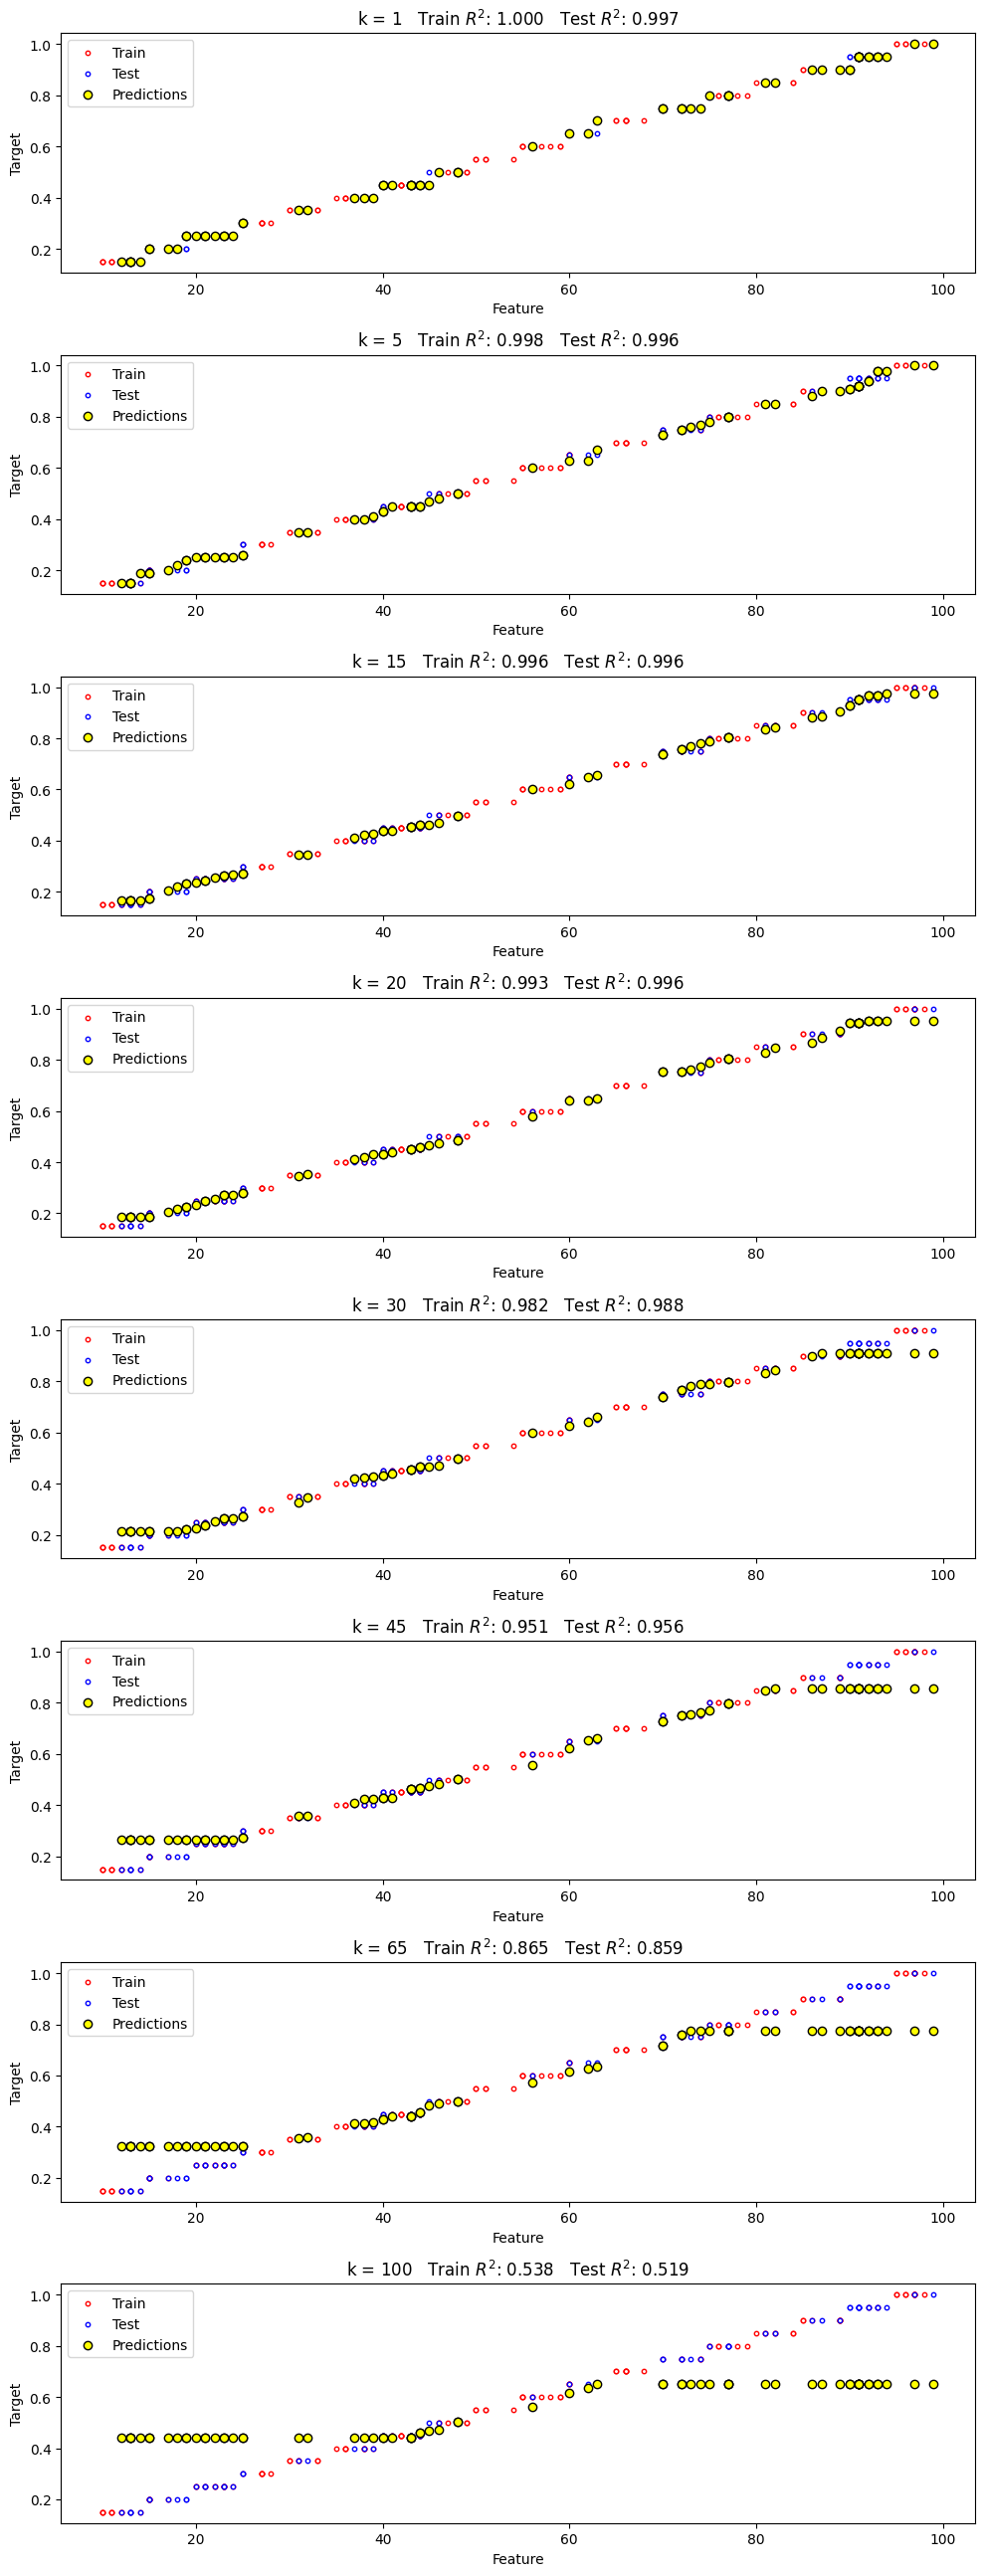

In [72]:
nneighbours = [1, 5, 15, 20, 30, 45, 65, 100]
fig, axes = plt.subplots(nrows = len(nneighbours))
fig.set_size_inches(10, 26)

for axis, n in zip(axes, nneighbours):
    
    kNNreg = KNeighborsRegressor(n_neighbors = n).fit(train_x, train_y)
    
    axis.scatter(train_x.ravel(), train_y, s = 10, color = "white", edgecolor = "red", label = "Train")
    axis.scatter(test_x.ravel(), test_y, s = 10, color = "white", edgecolor = "blue", label = "Test")
    axis.scatter(test_x.ravel(), kNNreg.predict(test_x), color = "yellow", edgecolor = "black", label = "Predictions")
    axis.legend()
    axis.set_xlabel("Feature")
    axis.set_ylabel("Target")
    axis.set_title(f"k = {n}   Train $R^{2}$: {kNNreg.score(train_x, train_y):.3f}   Test $R^{2}$: {kNNreg.score(test_x, test_y):.3f}")

plt.tight_layout()
plt.show()

In [ ]:
# kNN models are simple and easy to understand why a particular prediction was made.
# kNN can be a reasonable baseline, based on which we can compare other sophisticated models.
# When the dataset has many entries or many features, this can incur serious slowdowns in kNN models.

# If the data at hand has millions of rows with thousands of features, kNN might not be the best idea.